# Hierarchical Clustering

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('Universities.csv')

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
df_norm=norm_func(df.iloc[:,1:])

In [7]:
linkage_methods = ['single', 'complete', 'average', 'ward']

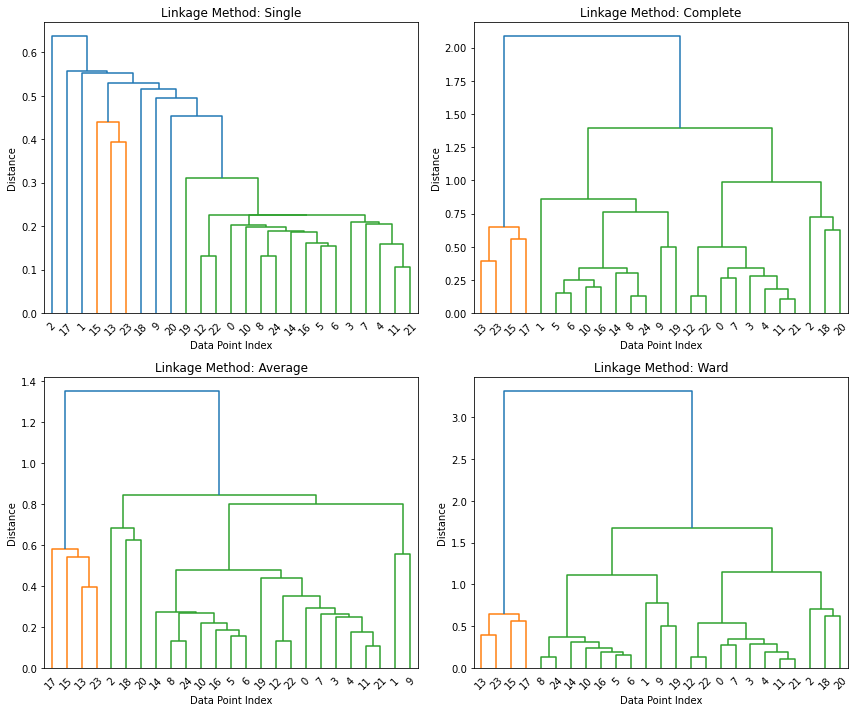

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    Z = sch.linkage(df_norm, method)
    ax = axes[i // 2, i % 2]
    sch.dendrogram(Z, ax=ax)
    ax.set_title(f'Linkage Method: {method.capitalize()}')
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [12]:
for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = model.fit_predict(df_norm)
    score = silhouette_score(df_norm, labels)
    print(f"Linkage Method: {method.capitalize()}, Silhouette Score: {score}")

Linkage Method: Single, Silhouette Score: 0.0696280981372806
Linkage Method: Complete, Silhouette Score: 0.2599652062010792
Linkage Method: Average, Silhouette Score: 0.3823617098115073
Linkage Method: Ward, Silhouette Score: 0.2599652062010792


Among all the linkage, Average Linkage gives the best Silhouette Score and therefore we will choose Average Linkage for this data.